# Model M27

This is a model which may be of interest to development and public finance economists. 
It assumes that there are two labor markets, a “formal” and an “informal” market.  Governments
are able to collect taxes on the former but not on the latter.   The representative household can
choose how much labor to supply to each market.  For simplicity, we assume that there is no
labor-leisure decision, and that all labor is supplied to one of the two markets, but that can be
very easily added and indeed we will suggest that as an exercise at the end.


There are many ways of doing this.  We first of all use an activity denoted LS which takes
household labor and produces two outputs, formal and informal labor (prices PLSF and PLSI)
according to a CET transformation function with an elasticity 5.0.  Think of this as a household
technology embodying the fact that the two types of labor are not perfect substitutes in supply. 
For example, this might be a crude simplification of the fact that the representative household is
actual many households (or household locations) some of whom are better at supplying formal
labor and vice versa.  Concentrating supply in either market leads to something like “diminishing
returns”, a concave transformation frontier between the two types of labor.


In addition, the two types of labor can be imperfect substitutes on the production side. 
That is what we assume here.  Only formal labor is used in the X sector, while both formal and
(mostly) informal labor are used in the Y sector.  The two types of labor are in a lower level nest
with an elasticity of substitution of 3.


The formal and informal labor supplies could go directly into production, but the listing
file will not directly tell us how much of each type is produced by activity LS.  Thus we use two
“dummy” activities LF and LI which take a unit of formal labor (LF) or informal labor (LI) and
just turn each unit into a unit of the same thing with a different commodity name (PLF and PLI)
which are the actual inputs into production.  This is just a trip so that the listing file will tell us
how much of each type of labor is supplied, the activity levels of LF and LI respectively.  In
addition, this trick is convenient in multi-sector models because the tax on formal labor need
only be specified once, in the LF activity, and not in every production block using formal labor.


Here is the program.  You will see from the listing file that the tax on formal labor supply
leads to a large shift of household supply toward informal labor and that there is a large shift in
output toward Y, the sector using informal labor.


|Markets |   X | Y   | W   |  LF | LI  | LS  || CONS| 
| ---    | --- | --- | --- | --- | --- | --- |---| --- |
| PX     | 100 |     | -100|     |     |     ||     |
| PY     |     | 100 | -100|     |     |     ||     |
| PW     |     |     | 200 |     |     |     || -200|
| PLF    | -40 | -10 |     | 50  |     |     ||     |
| PLI    |     | -50 |     |     | 50  |     ||     |
| PLSF   |     |     |     | -50 |     | 50  ||     |
| PLSI   |     |     |     |     | -50 | 50  ||     |
| PL     |     |     |     |     |     | -100|| 100 |
| PK     | -60 | -40 |     |     |     |     || 100 |


In [47]:
using MPSGE_MP

import JuMP

In [48]:
M27 = MPSGEModel()

@parameter(M27, TL, 0)

@sectors(M27, begin
    X,  (description = "Activity Level for Sector X",)
    Y,  (description = "Activity Level for Sector Y",)
    LS, (description = "Activity Level for household labor supply",)
    LF, (description = "Activity for formal labor supply",)
    LI, (description = "Activity for informal labor supply",)
    W,  (description = "Activity Level for Sector W (Hicksian welfare index)",)
end)


@commodities(M27, begin
    PX,   (description = "Price index for commodity X",)
    PY,   (description = "Price index for commodity Y",)
    PL,   (description = "Price index for labor",)
    PLSF, (description = "Price index for formal labor supplied to market",)
    PLSI, (description = "Price index for informal labor supply to market",)
    PLF,  (description = "Price index formal labor supplied to firms",)
    PLI,  (description = "Price index for informal labor supplied to firms",)
    PK,   (description = "Price index for primary factor K",)
    PW,   (description = "Price index for welfare (expenditure function)",)
end)

@consumers(M27, begin
    CONS, (description = "Income level for consumer CONS",)
end)

@production(M27, X, [s=1,t=0], begin
    @output(PX, 100, t)
    @input(PLF, 40,  s)
    @input(PK,  60,  s)
end)

@production(M27, Y, [t = 0, s=1, a=>s=3], begin
    @output(PY, 100, t)
    @input(PLF, 10,  a)
    @input(PLI, 50,  a)
    @input(PK,  40,  s)
end)

@production(M27, LS, [s=0, t=5], begin
    @output(PLSF, 50,  t)
    @output(PLSI, 50,  t)
    @input(PL,    100, s)
end)

@production(M27, LF, [s=0, t=0], begin
    @output(PLF, 50, t)
    @input(PLSF, 50, s, taxes = [Tax(CONS, TL)])
end)

@production(M27, LI, [s=0,t=0], begin
    @output(PLI, 50, t)
    @input(PLSI, 50, s)
end)

@production(M27, W, [s=1,t=0], begin
    @output(PW, 200, t)
    @input(PX,  100, s)
    @input(PY,  100, s)
end)

@demand(M27, CONS, begin
    @final_demand(PW, 200)
    end, begin
    @endowment(PL, 100)
    @endowment(PK, 100)
end);

# Benchmark replication

In [49]:
fix(PW, 1)

solve!(M27, cumulative_iteration_limit = 0)

generate_report(M27)

Reading options file C:\Users\MPHILL~1\AppData\Local\Temp\jl_904B.tmp
 > cumulative_iteration_limit 0
Read of options file complete.

Path 5.0.03 (Fri Jun 26 10:05:33 2020)
Written by Todd Munson, Steven Dirkse, Youngdae Kim, and Michael Ferris
Preprocessed size   : 15

Major Iteration Log
major minor  func  grad  residual    step  type prox    inorm  (label)
    0     0     1     1 0.0000e+00           I 0.0e+00 0.0e+00 (zero_profit[X)

Major Iterations. . . . 0
Minor Iterations. . . . 0
Restarts. . . . . . . . 0
Crash Iterations. . . . 0
Gradient Steps. . . . . 0
Function Evaluations. . 1
Gradient Evaluations. . 1
Basis Time. . . . . . . 0.000000
Total Time. . . . . . . 0.000000
Residual. . . . . . . . 0.000000e+00
Postsolved residual: 0.0000e+00


Row,var,value,margin
,GenericV…,Float64,Float64
1,Y,1.0,0.0
2,X,1.0,0.0
3,W,1.0,0.0
4,LS,1.0,0.0
5,PW,1.0,0.0
6,PK,1.0,0.0
7,PLSF,1.0,0.0
8,PLI,1.0,0.0
9,PLSI,1.0,0.0


# Counterfactual

In [50]:
set_value!(TL, .5)

solve!(M27)
generate_report(M27)

Reading options file C:\Users\MPHILL~1\AppData\Local\Temp\jl_9108.tmp
 > cumulative_iteration_limit 10000
Read of options file complete.

Path 5.0.03 (Fri Jun 26 10:05:33 2020)
Written by Todd Munson, Steven Dirkse, Youngdae Kim, and Michael Ferris

Preprocessed size   : 15

Crash Log
major  func  diff  size  residual    step       prox   (label)
    0     0             2.6575e+01             0.0e+00 (income_balance[CONS)
    1     1     0    15 4.1649e+00  1.0e+00    0.0e+00 (market_clearance[PLSI)
pn_search terminated: no basis change.

Major Iteration Log
major minor  func  grad  residual    step  type prox    inorm  (label)
    0     0     2     2 4.1649e+00           I 0.0e+00 3.1e+00 (market_clearanc)
    1     1     3     3 9.2625e-02  1.0e+00 SO 0.0e+00 6.7e-02 (market_clearanc)
    2     1     4     4 6.4560e-05  1.0e+00 SO 0.0e+00 4.2e-05 (market_clearanc)
    3     1     5     5 3.0997e-11  1.0e+00 SO 0.0e+00 2.0e-11 (market_clearanc)

Major Iterations. . . . 3
Minor Iterati

Row,var,value,margin
,GenericV…,Float64,Float64
1,Y,1.05214,-5.1017e-12
2,X,0.928589,-1.09424e-11
3,W,0.988438,-2.70006e-13
4,LS,1.0,-5.98277e-12
5,PW,1.0,-4.63274e-11
6,PK,0.988438,-7.9865e-12
7,PLSF,0.793049,1.53619e-11
8,PLI,0.872479,-9.80549e-13
9,PLSI,0.872479,-7.22622e-12


# Graphs 

Exploring how the formal and informal labor supplies change with taxes on the formal labor market

In [73]:
using Plots
using DataFrames

This is a bit of magic that should be formalized in some nice way

In [75]:
values = []

jm = jump_model(M27)
JuMP.set_silent(jm)

tax_rates = 0:.01:1

variables = JuMP.all_variables(jm)
variable_names = Tuple(Symbol.(variables))

for tax_rate ∈ tax_rates
    set_value!(TL, tax_rate)
    solve!(M27; cumulative_iteration_limit=10_000)
    push!(values, 
        NamedTuple{variable_names}(value.(variables))
    )
end

df = DataFrame(values);

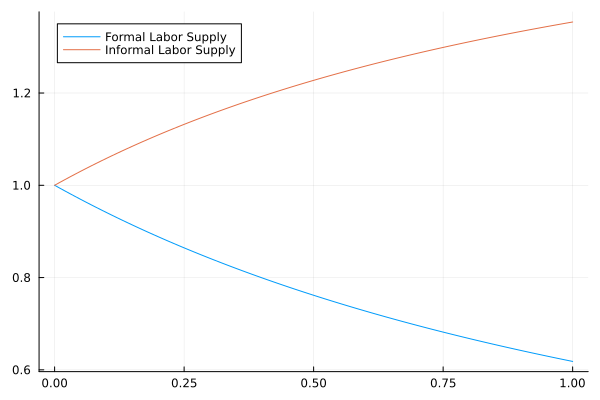

In [76]:
plot(df[!,:TL], df[!,:LF], label = "Formal Labor Supply")
plot!(df[!,:TL], df[!,:LI], label = "Informal Labor Supply")

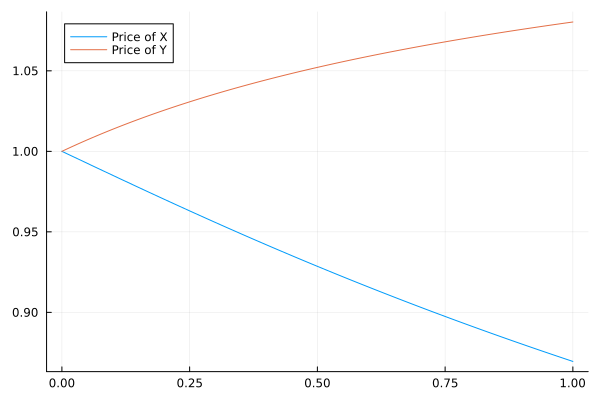

In [81]:
plot(df[!,:TL], df[!,:PX], label = "Price of X")
plot!(df[!,:TL], df[!,:PY], label = "Price of Y")

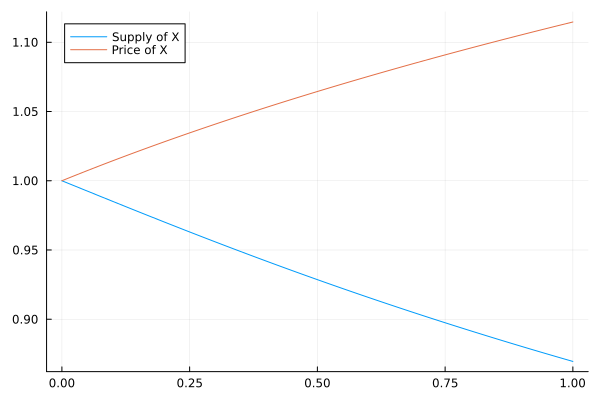

In [86]:
plot(df[!,:TL], df[!,:X], label = "Supply of X")
plot!(df[!,:TL], df[!,:PX], label = "Price of X")